In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
loan_data = pd.read_csv('D:/Python_e/loan_status_prediction/strat_train_set.csv')

In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            246 non-null    object 
 1   Gender             246 non-null    object 
 2   Married            246 non-null    object 
 3   Dependents         246 non-null    object 
 4   Education          246 non-null    object 
 5   Self_Employed      246 non-null    object 
 6   ApplicantIncome    246 non-null    int64  
 7   CoapplicantIncome  246 non-null    float64
 8   LoanAmount         246 non-null    float64
 9   Loan_Amount_Term   246 non-null    float64
 10  Credit_History     246 non-null    float64
 11  Property_Area      246 non-null    object 
 12  Loan_Status        246 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 25.1+ KB


In [6]:
loan_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,246.000000,246.000000,246.000000,246.000000,246.000000
mean,3612.585366,1340.385854,104.008130,342.682927,0.853659
std,1484.644122,2719.547974,29.540839,63.778356,0.354169
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2583.000000,0.000000,88.250000,360.000000,1.000000
50%,3348.500000,1014.500000,110.000000,360.000000,1.000000
75%,4297.000000,1960.500000,127.750000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


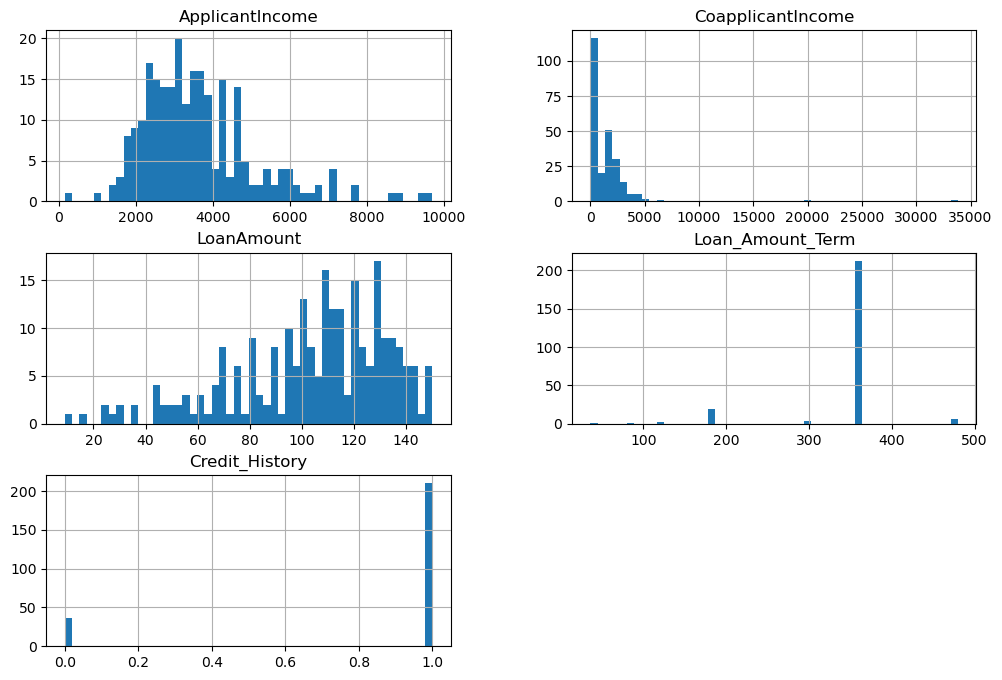

In [7]:
loan_data.hist(bins=50, figsize=(12, 8))
plt.show()

In [8]:
loan_data_encoded = pd.get_dummies(loan_data, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status'])

print(loan_data_encoded)

      Loan_ID  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0    LP001825             1809             1868.0        90.0   
1    LP001608             2045             1619.0       101.0   
2    LP001993             3762             1666.0       135.0   
3    LP002836             3333                0.0        70.0   
4    LP001343             1759             3541.0       131.0   
..        ...              ...                ...         ...   
241  LP001043             7660                0.0       104.0   
242  LP002743             2138                0.0        99.0   
243  LP002714             2679             1302.0        94.0   
244  LP001032             4950                0.0       125.0   
245  LP001228             3200             2254.0       126.0   

     Loan_Amount_Term  Credit_History  Gender_Female  Gender_Male  Married_No  \
0               360.0             1.0              0            1           0   
1               360.0             1.0              0     

In [9]:
loan_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  246 non-null    object 
 1   ApplicantIncome          246 non-null    int64  
 2   CoapplicantIncome        246 non-null    float64
 3   LoanAmount               246 non-null    float64
 4   Loan_Amount_Term         246 non-null    float64
 5   Credit_History           246 non-null    float64
 6   Gender_Female            246 non-null    uint8  
 7   Gender_Male              246 non-null    uint8  
 8   Married_No               246 non-null    uint8  
 9   Married_Yes              246 non-null    uint8  
 10  Dependents_0             246 non-null    uint8  
 11  Dependents_1             246 non-null    uint8  
 12  Dependents_2             246 non-null    uint8  
 13  Dependents_3+            246 non-null    uint8  
 14  Education_Graduate       2

In [12]:
from sklearn.preprocessing import StandardScaler

numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
numerical_data = loan_data_encoded[numerical_columns]
scaler = StandardScaler()

# Fit and transform the numerical data
numerical_data_standardized = scaler.fit_transform(numerical_data)

# Create a new DataFrame with standardized numerical columns
loan_data_standardized = pd.DataFrame(numerical_data_standardized, columns=numerical_columns)

loan_data_encoded = loan_data_encoded.drop(columns=numerical_columns)

loan_data_transformed = loan_data_encoded.join(loan_data_standardized)

loan_data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  246 non-null    object 
 1   Credit_History           246 non-null    float64
 2   Gender_Female            246 non-null    uint8  
 3   Gender_Male              246 non-null    uint8  
 4   Married_No               246 non-null    uint8  
 5   Married_Yes              246 non-null    uint8  
 6   Dependents_0             246 non-null    uint8  
 7   Dependents_1             246 non-null    uint8  
 8   Dependents_2             246 non-null    uint8  
 9   Dependents_3+            246 non-null    uint8  
 10  Education_Graduate       246 non-null    uint8  
 11  Education_Not Graduate   246 non-null    uint8  
 12  Self_Employed_No         246 non-null    uint8  
 13  Self_Employed_Yes        246 non-null    uint8  
 14  Property_Area_Rural      2

In [13]:
print(loan_data_transformed)

      Loan_ID  Credit_History  Gender_Female  Gender_Male  Married_No  \
0    LP001825             1.0              0            1           0   
1    LP001608             1.0              0            1           0   
2    LP001993             1.0              1            0           1   
3    LP002836             1.0              0            1           1   
4    LP001343             1.0              0            1           0   
..        ...             ...            ...          ...         ...   
241  LP001043             0.0              0            1           0   
242  LP002743             0.0              1            0           1   
243  LP002714             1.0              0            1           1   
244  LP001032             1.0              0            1           1   
245  LP001228             0.0              0            1           1   

     Married_Yes  Dependents_0  Dependents_1  Dependents_2  Dependents_3+  \
0              1             1             0  

In [15]:
loan_data_transformed = loan_data_transformed.drop(columns=['Loan_Status_N', 'Loan_Status_Y'])
loan_data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Loan_ID                  246 non-null    object 
 1   Credit_History           246 non-null    float64
 2   Gender_Female            246 non-null    uint8  
 3   Gender_Male              246 non-null    uint8  
 4   Married_No               246 non-null    uint8  
 5   Married_Yes              246 non-null    uint8  
 6   Dependents_0             246 non-null    uint8  
 7   Dependents_1             246 non-null    uint8  
 8   Dependents_2             246 non-null    uint8  
 9   Dependents_3+            246 non-null    uint8  
 10  Education_Graduate       246 non-null    uint8  
 11  Education_Not Graduate   246 non-null    uint8  
 12  Self_Employed_No         246 non-null    uint8  
 13  Self_Employed_Yes        246 non-null    uint8  
 14  Property_Area_Rural      2

In [16]:
loan_data_labels = loan_data['Loan_Status']
print(loan_data_labels)

0      Y
1      Y
2      Y
3      Y
4      Y
      ..
241    N
242    N
243    Y
244    Y
245    N
Name: Loan_Status, Length: 246, dtype: object


In [19]:
loan_data_transformed.to_csv('loan_data_transformed.csv', index=False)

loan_data_labels.to_csv('loan_data_labels.csv', index=False)